In [2]:
import pandas as pd
import sklearn
import numpy as np

print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Numpy version: {np.__version__}")


Pandas version: 2.3.3
Scikit-learn version: 1.7.2
Numpy version: 2.3.3


In [5]:

# --- Загальний блок імпорту ---

# 1. Робота з даними
import numpy as np
import pandas as pd

# 2. Візуалізація
import matplotlib.pyplot as plt
import seaborn as sns # (Додатково для кращих візуалізацій)

# 3. Генерація даних
from sklearn.datasets import make_regression # (Для Завдання 1)

# 4. Модель та її підготовка
from sklearn.linear_model import LinearRegression # (Основна модель)
from sklearn.model_selection import train_test_split # (Для Завдання 2)

# 5. Оцінка моделі
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Налаштування візуалізацій
plt.style.use('ggplot')
%matplotlib inline

In [7]:
# --- Завдання 1: Генерація даних ---
X_gen, y_gen = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    noise=15.0,
    random_state=42  # random_state для відтворюваності результатів
)

# Перетворимо на pandas.DataFrame для зручності та уніфікації
df_gen = pd.DataFrame({'X_Feature': X_gen.flatten(), 'y_Target': y_gen})

# Підготовка змінних для моделі 
X_gen = df_gen[['X_Feature']]
y_gen = df_gen

print("Перші 5 рядків згенерованих даних (Завдання 1):")
print(df_gen.head())


Перші 5 рядків згенерованих даних (Завдання 1):
   X_Feature   y_Target
0   0.931280  56.733566
1   0.087047 -16.914625
2  -1.057711 -30.302579
3   0.314247   9.231600
4  -0.479174 -16.606936


In [8]:
# --- Завдання 1: Моделювання ---

# 1. Створення і навчання моделі
model_gen = LinearRegression()
model_gen.fit(X_gen, y_gen)

# 2. Передбачення значень
y_gen_pred = model_gen.predict(X_gen)

# 3. Оцінка моделі
mse_gen = mean_squared_error(y_gen, y_gen_pred)
mae_gen = mean_absolute_error(y_gen, y_gen_pred)
r2_gen = r2_score(y_gen, y_gen_pred)

print("--- Результати Завдання 1 (make_regression) ---")
print(f"Середньоквадратична похибка (MSE): {mse_gen:.2f}")
print(f"Середня абсолютна похибка (MAE): {mae_gen:.2f}")
print(f"Коефіцієнт детермінації (R^2): {r2_gen:.2f}")


--- Результати Завдання 1 (make_regression) ---
Середньоквадратична похибка (MSE): 87.81
Середня абсолютна похибка (MAE): 5.33
Коефіцієнт детермінації (R^2): 0.95


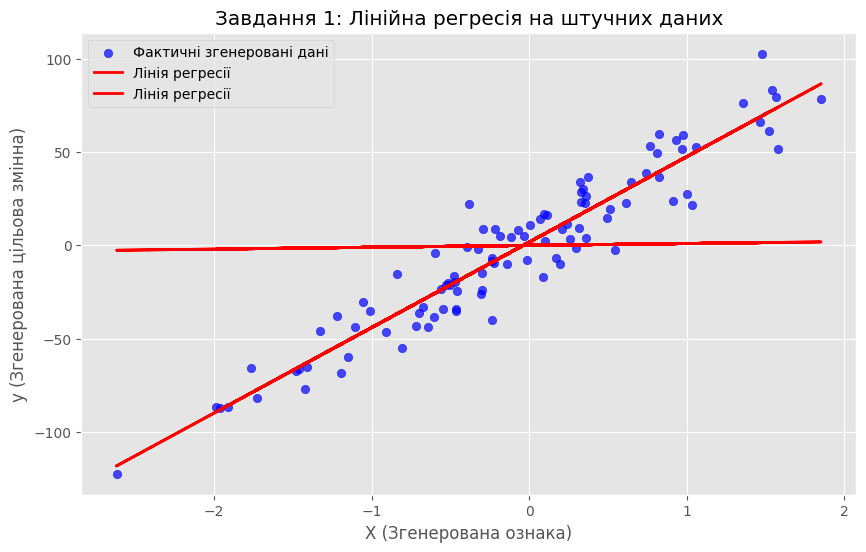

In [ ]:

# --- Завдання 1: Візуалізація (Виправлено) ---
plt.figure(figsize=(10, 6))

# x = X_gen.iloc[:, 0]  (Перший стовпець, наприклад 'X_Feature')
# y = y_gen.iloc[:, 1]  (Другий стовпець, наприклад 'y_Target')
plt.scatter(X_gen.iloc[:, 0], y_gen.iloc[:, 1], color='blue', label='Фактичні згенеровані дані', alpha=0.7)

# Для лінії регресії ми все ще використовуємо ПЕРШИЙ стовпець для X
plt.plot(X_gen.iloc[:, 0], y_gen_pred, color='red', linewidth=2, label='Лінія регресії')

plt.xlabel('X (Згенерована ознака)')
plt.ylabel('y (Згенерована цільова змінна)')
plt.title('Завдання 1: Лінійна регресія на штучних даних')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# --- Завдання 2: Завантаження та Підготовка Даних ---
try:
    df_kaggle = pd.read_csv("Saytoris/Data-Science-Labs/Lab_3/Student_Performance.csv")
except FileNotFoundError:
    print("ПОМИЛКА: Файл 'student-mat.csv' не знайдено.")
    print("Будь ласка, завантажте його з Kaggle (dataset: 'Student Performance') і розмістіть у теці проекту.")
    # Створення заглушки, щоб уникнути подальших помилок
    df_kaggle = pd.DataFrame() 

if not df_kaggle.empty:
    print("Перші 5 рядків даних з Kaggle:")
    print(df_kaggle.head())
    
    # print("\nІнформація про дані:")
    # df_kaggle.info()

    # --- Вибір Ознак (Feature Selection) ---
    # Наша мета: спрогнозувати фінальну оцінку (G3)
    # Ми оберемо лише числові ознаки для простоти
    # Ознаки (X): попередні оцінки (G1, G2), час навчання (studytime),
    #              кількість невдач (failures) та пропусків (absences).
    features = ['G1', 'G2', 'studytime', 'failures', 'absences']
    target = 'G3'

    X_kaggle = df_kaggle[features]
    y_kaggle = df_kaggle[target]

    # --- Розділення Даних ---
    # Це найкраща практика: навчати модель на одних даних (train),
    # а перевіряти її якість на інших, "небачених" (test).
    # Ми використаємо 70% даних для навчання і 30% для тесту.
    X_train, X_test, y_train, y_test = train_test_split(
        X_kaggle, 
        y_kaggle, 
        test_size=0.3, 
        random_state=42
    )
    
    print(f"\nРозмір навчального набору (X_train): {X_train.shape}")
    print(f"Розмір тестового набору (X_test): {X_test.shape}")

ПОМИЛКА: Файл 'student-mat.csv' не знайдено.
Будь ласка, завантажте його з Kaggle (dataset: 'Student Performance') і розмістіть у теці проекту.
